In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [3]:
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')

In [4]:
len(travel_diff)

27486

In [5]:
for column in employ.columns[2:]:
    employ[f'propor_{column}'] = employ[column] / employ['N_Total']

In [6]:
travel_diff_jobs = gpd.GeoDataFrame(travel_diff.merge(employ, left_on='fromId', right_on='GeoUID'), geometry='geometry')

In [7]:
len(travel_diff_jobs)

17753

In [8]:
travel_diff_jobs.columns

Index(['fromId', 'toId_x', 'tt_2019', 'tt_2020', 'diff', 'GeoUID_x',
       'neg_access', 'time', 'weekend', 'geometry', 'GeoUID_y', 'N_Total',
       'N11_Agriculture', 'N21_Mining', 'N22_Utilities', 'N23_Construction',
       'N3133_Manufact', 'N41_Wholesale', 'N4445_Retail', 'N4849_Transport',
       'N51_Information', 'N52_Finance', 'N53_RealEstate', 'N54_Professional',
       'N55_Management', 'N56_Admin', 'N61_Education', 'N62_Health',
       'N71_Arts', 'N72_Accommod', 'N81_Other', 'N91_PublicAdmin',
       'propor_N11_Agriculture', 'propor_N21_Mining', 'propor_N22_Utilities',
       'propor_N23_Construction', 'propor_N3133_Manufact',
       'propor_N41_Wholesale', 'propor_N4445_Retail', 'propor_N4849_Transport',
       'propor_N51_Information', 'propor_N52_Finance', 'propor_N53_RealEstate',
       'propor_N54_Professional', 'propor_N55_Management', 'propor_N56_Admin',
       'propor_N61_Education', 'propor_N62_Health', 'propor_N71_Arts',
       'propor_N72_Accommod', 'propor_N8

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


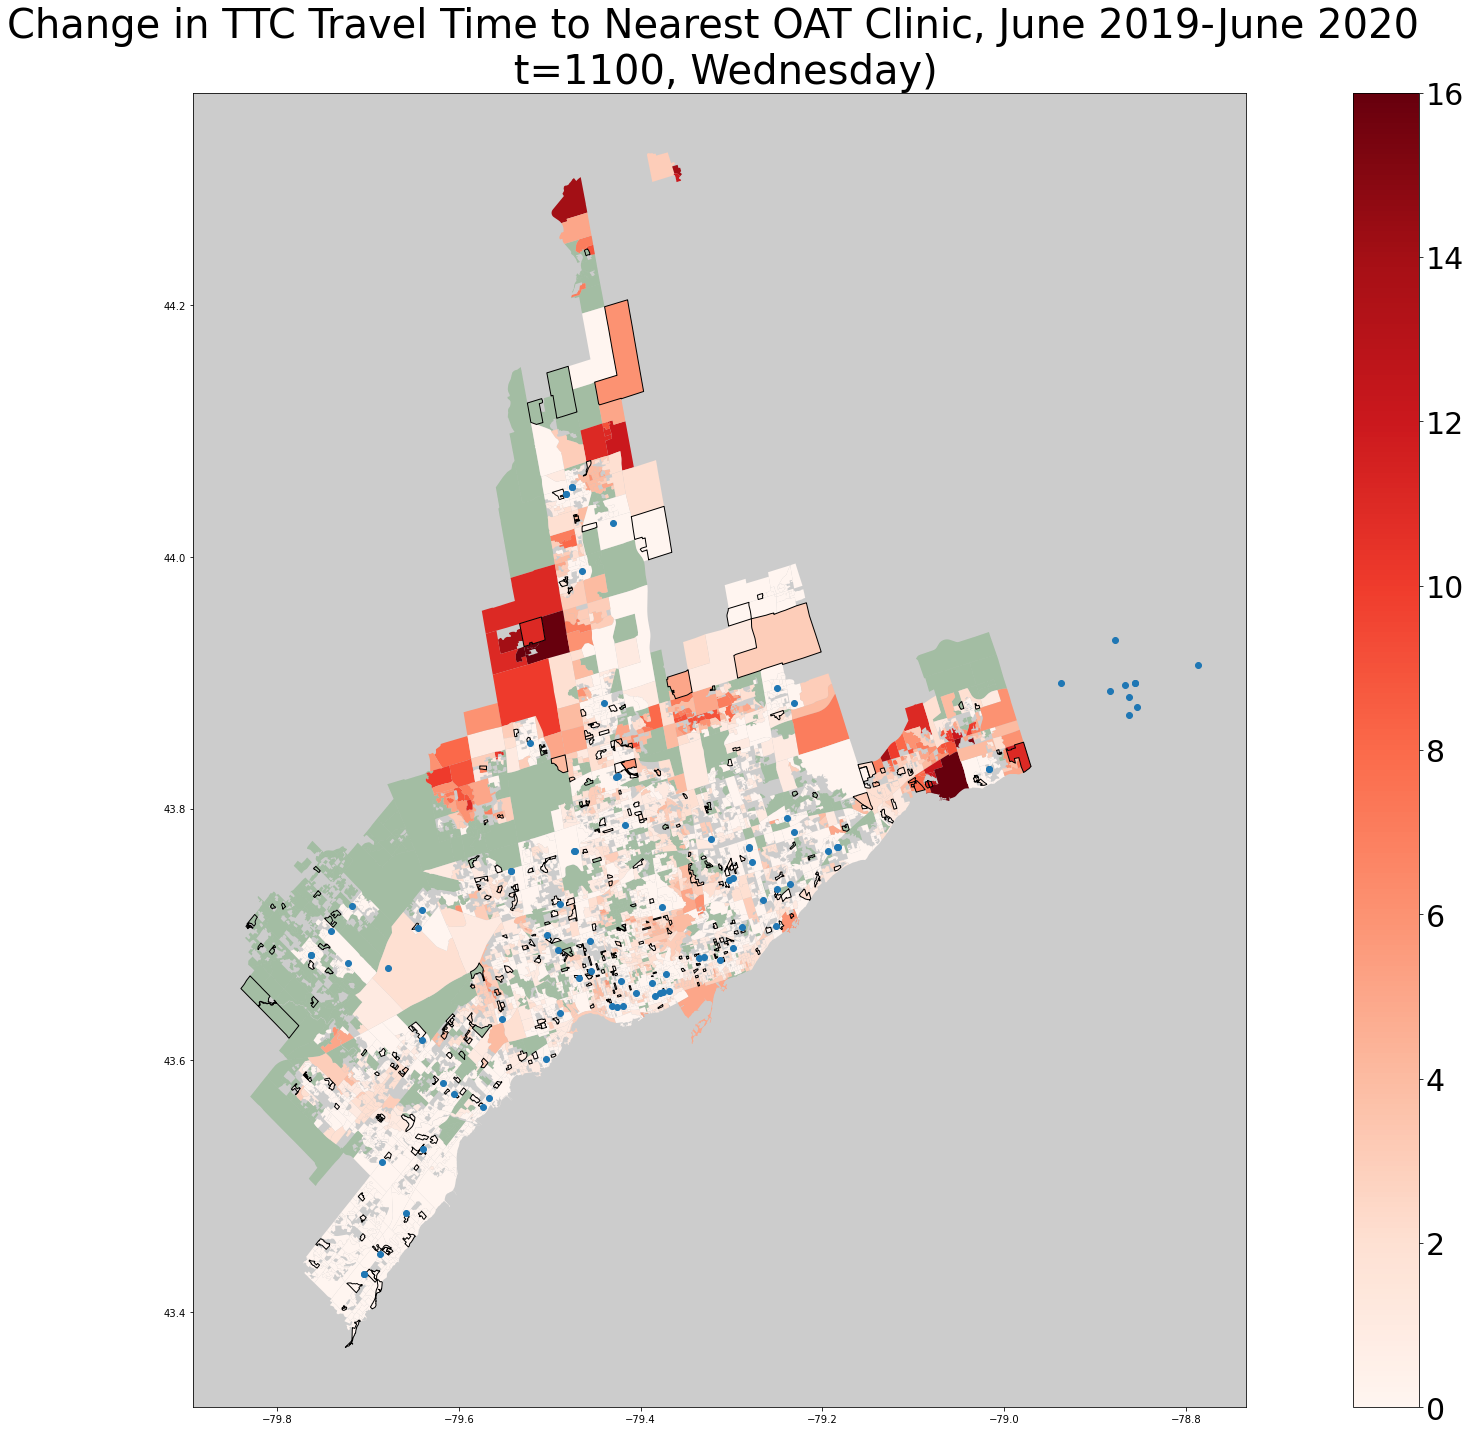

In [9]:
fig, ax = plt.subplots(figsize = (30, 20))
travel_diff_jobs[(travel_diff_jobs['time'] == '1100') & (travel_diff_jobs['neg_access'] == 0)].plot(column='diff', color='green', alpha=0.2, legend=True, ax=ax)
travel_diff_jobs[(travel_diff_jobs['time'] == '1100') & (travel_diff_jobs['neg_access'] == 1)].plot(column='diff', cmap='Reds', legend=True, ax=ax)
travel_diff_jobs[(travel_diff_jobs['time'] == '1100') & (travel_diff_jobs['propor_N23_Construction'] >= 0.15)].plot(facecolor='none', edgecolor='black', linewidth=1, ax=ax)
clinics_gdf.plot(ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t=1100, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/1100_construction.png')